In [46]:
import sys
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
from pylab import *

def run_mnist():
    # Import data
    mnist = input_data.read_data_sets('/tmp/tensorflow/mnist/input_data', one_hot=True)

    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x, W) + b
    y_ = tf.placeholder(tf.float32, [None, 10])
    #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
    #                                 reduction_indices=[1]))


    model = tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y)
    cross_entropy = tf.reduce_mean(model)

    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    # Train
    loss = []
    for _ in range(1000):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        _,loss_val = sess.run([train_step, cross_entropy], feed_dict={x: batch_xs, y_: batch_ys})
        loss.append(loss_val)

    # Test trained model
    plt.plot(loss)
    plt.show()
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy: ",sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))


Extracting /tmp/tensorflow/mnist/input_data/train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data/t10k-labels-idx1-ubyte.gz


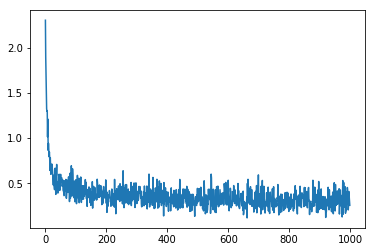

Accuracy:  0.9196


In [47]:
run_mnist()